<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [25]:
import pandas as pd
import unicodedata
import random
from train import training
from util import load_data, evaluate,  df_tolist
from sklearn.utils import shuffle

In [29]:
# change to dataframe to Spacy format
# wikidata featured articles scraped text
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/notebooks/final_list1.csv', encoding = 'utf8')
df= df[(df['Statements'].str.split().str.len() >20)].reset_index(drop=True)
df['Statements'] = df['Statements'].astype(str)
print(df.shape)
print(df.label.value_counts())
df.head()

(32788, 2)
0    20465
1    12323
Name: label, dtype: int64


,Statements,label
0,This initiated progressive collapse of the ent...,1
1,It was also one of the first projects accepted...,1
2,"The building was 610 feet (190 m) tall, with a...",1
3,The substation had a caisson foundation design...,1
4,The final design for 7 World Trade Center was ...,1


In [30]:
df1 = df[df['label']==1]
df2 = df[df['label']==0]

In [35]:
df3=pd.concat([df1,df2[:12323]])

In [36]:
df3.label.value_counts()

1    12323
0    12323
Name: label, dtype: int64

In [37]:
df3.head()

,Statements,label
0,This initiated progressive collapse of the ent...,1
1,It was also one of the first projects accepted...,1
2,"The building was 610 feet (190 m) tall, with a...",1
3,The substation had a caisson foundation design...,1
4,The final design for 7 World Trade Center was ...,1


In [18]:
df3.to_csv('sents_listV3.csv', index=False)

In [55]:
# Processing the final format of training and validation data
# Calling the load_data() function 

(train_texts, train_cats), (dev_texts, dev_cats) = load_data(df3,split=0.8)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
print(train_data[:1])
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
print(dev_data[:1])


[('In his conclusions, Smith noted that Lancaster was favourably situated to provide a healthy environment for its inhabitants, and that this could be achieved by "a complete and constant supply of pure and soft water, and   a thorough system of drainage and sewerage".', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]


In [39]:
# Converting the dataframe into a list of tuples
# change to dataframe to Spacy format
# wikidata citation needed text
df4 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df4 = shuffle(df4)
test1 =df_tolist(df4)
print(df4.shape)
random.shuffle(test1)

test_texts1, test_cats1 = zip(*test1[:4000])
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))

(19998, 2)


In [40]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df5 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df5 = shuffle(df5)
test2 =df_tolist(df5)
print(df5.shape)
random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2[:4000])
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))

(19980, 2)


In [41]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

19716
4000
4000
4930


In [43]:
# Model 1 - cnn, L2 =2e-4
train_results1, dev_results1, test_results1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataL2-2e-4')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
13.6897	0.9712	0.9631	0.7135	0.9728	0.9695	0.9711
2.9058	0.9830	0.9773	0.7245	0.9692	0.9978	0.9833
1.6088	0.9872	0.9805	0.7345	0.9770	0.9979	0.9873
1.7525	0.9887	0.9805	0.7195	0.9783	0.9995	0.9888
1.3494	0.9917	0.9803	0.6945	0.9852	0.9984	0.9917
Saved model to model_artifactnewdataL2-2e-4


In [44]:
# Model 2 - cnn, L2 0.0001 
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 0.001, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataL2-0.001')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
13.7329	0.9658	0.9704	0.7500	0.9732	0.9579	0.9655
3.5510	0.9770	0.9773	0.7462	0.9587	0.9969	0.9774
2.1554	0.9814	0.9787	0.6810	0.9729	0.9905	0.9816
2.2494	0.9795	0.9793	0.6512	0.9615	0.9989	0.9798
2.1275	0.9834	0.9809	0.6435	0.9827	0.9841	0.9834
Saved model to model_artifactnewdataL2-0.001


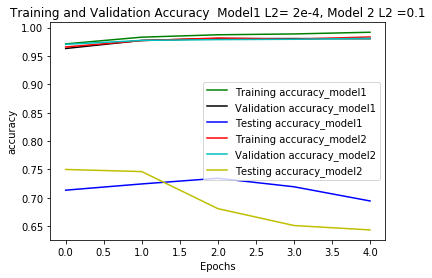

In [48]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_results1]
accuracy_dev = [(d['textcat_a']) for d in dev_results1]
accuracy_test = [(d['textcat_a']) for d in test_results1]
accuracy_train1 = [(d['textcat_a']) for d in train_results2]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results2]
accuracy_test1 = [(d['textcat_a']) for d in test_results2]
epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy_model1')
plt.plot(epochs, accuracy_dev, 'k', label='Validation accuracy_model1')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy_model1')
plt.plot(epochs, accuracy_train1, 'r', label='Training accuracy_model2')
plt.plot(epochs, accuracy_dev1, 'c', label='Validation accuracy_model2')
plt.plot(epochs, accuracy_test1, 'y', label='Testing accuracy_model2')
plt.title('Training and Validation Accuracy  Model1 L2= 2e-4, Model 2 L2 =0.1')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

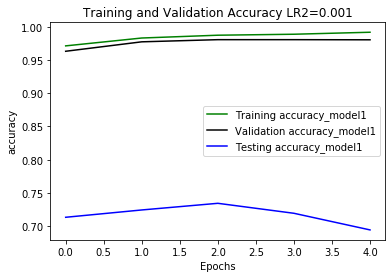

In [49]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_results1]
accuracy_dev = [(d['textcat_a']) for d in dev_results1]
accuracy_test = [(d['textcat_a']) for d in test_results1]

epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy_model1')
plt.plot(epochs, accuracy_dev, 'k', label='Validation accuracy_model1')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy_model1')

plt.title('Training and Validation Accuracy LR2=0.001')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

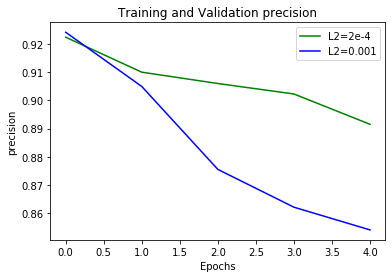

In [54]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_p']) for d in test_results1]
precision_test2 = [(d['textcat_p']) for d in test_results2]
#precision_test3 = [(d['textcat_p']) for d in test_result3]
#precision_test4 = [(d['textcat_p']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='L2=2e-4')
plt.plot(epochs, precision_test2, 'b', label='L2=0.001')
#plt.plot(epochs, precision_test3, 'r', label='3')
#plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_a']) for d in test_results1]
precision_test2 = [(d['textcat_a']) for d in test_results2]
precision_test3 = [(d['textcat_a']) for d in test_result3]
precision_test4 = [(d['textcat_a']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='1')
plt.plot(epochs, precision_test2, 'b', label='2')
plt.plot(epochs, precision_test3, 'r', label='3')
plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Test accuracy ')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [58]:
import spacy
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
loaded_model = spacy.load('E:/Sharpest_Mind/WikipediaCitation/notebooks/model_artifactnewdataL2-0.001')
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.21122442185878754, 'NEGATIVE': 0.788775622844696}

In [ ]:
spacy.displacy.render(doc, style='ent')

In [61]:
# Testing the model - negative sentences
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. As the need for geographical accuracy increased, these illustrations gradually slipped off the map and onto the borders and eventually disappeared altogether in the wake of modern scientific cartography."
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.16090162098407745, 'NEGATIVE': 0.839098334312439}

In [60]:
# Testing the model - negative sentence
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. As the need for geographical accuracy increased, these illustrations gradually slipped off the map and onto the borders and eventually disappeared altogether in the wake of modern scientific cartography."
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.16090162098407745, 'NEGATIVE': 0.839098334312439}

In [59]:
#positive sentence 

test_text1 = 'Anthropomorphic maps date back to when Sebastian Münster used a queen to depict Europe in 1570.'
doc=loaded_model(test_text1)
doc.cats

{'POSITIVE': 0.998630940914154, 'NEGATIVE': 0.0013690843479707837}

In [ ]:
#positive sentence 

test_text = 'The leading panoramic map artists in the U.S.A. were Herman Brosius, Camille N. Drie, Thaddeus Mortimer Fowler, Paul Giraud, Augustus Koch, D. D. Morse, Henry Welge, and A. L. Westyard.'
doc=nlp(test_text)
doc.cats